In [1]:
%matplotlib ipympl

import re
import sxs
import numpy as np
import bilby
import scipy.interpolate
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import mpl_interactions.ipyplot as iplt

import sxs_iplots as isxs

## Import and create noise curves for LIGO O4 and Cosmic Explorer

In [2]:
ce = bilby.gw.detector.psd.PowerSpectralDensity(psd_file = '/home/fs01/jhc325/miniforge3/envs/sxsenv/lib/python3.12/site-packages/bilby/gw/detector/noise_curves/CE_psd.txt', asd_file = '/home/fs01/jhc325/miniforge3/envs/sxsenv/lib/python3.12/site-packages/bilby/gw/detector/noise_curves/CE_wb_asd.txt')
ligo_o4 = bilby.gw.detector.psd.PowerSpectralDensity(asd_file = '/home/fs01/jhc325/miniforge3/envs/sxsenv/lib/python3.12/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt')

ce_asd_file = open(ce.asd_file, "r")
ce_asd = ce_asd_file.readlines()
ce_asd_file.close()
ce_asd_amplitude = []; ce_asd_frequency = []
for i in ce_asd:
    split_line = re.split(" |\n", i)
    ce_asd_amplitude.append(float(split_line[0]))
    ce_asd_frequency.append(float(split_line[1]))
#print(ce_asd_frequency)

ligo_o4_asd_file = open(ligo_o4.asd_file, "r")
ligo_o4_asd = ligo_o4_asd_file.readlines()
ligo_o4_asd_file.close()
ligo_o4_asd_amplitude = []; ligo_o4_asd_frequency = []
for i in ligo_o4_asd:
    split_line = re.split(" |\n", i)
    ligo_o4_asd_amplitude.append(float(split_line[0]))
    ligo_o4_asd_frequency.append(float(split_line[1]))
#print(ligo_o4_asd_frequency)

## Example 1: BBH:2139 (Mass Ratio: 3)

We first initialize conditions for plotting the frequency domain (L,M) plots for the simulation

In [3]:
metadata2139, h2139 = isxs.load_strain("2139")

Mass ratio: 2.9998010324655313


In [4]:
# constants
G = 6.67430e-11
c = 3e8
M = 6.563e+31
r = 3.086e24

h2139, t2139, f22_2139, df22dt_2139, dt, i1_2139, i2_2139 = isxs.initialize(h2139, G, c, M, r)

/home/fs01/jhc325/miniforge3/envs/sxsenv/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


16055


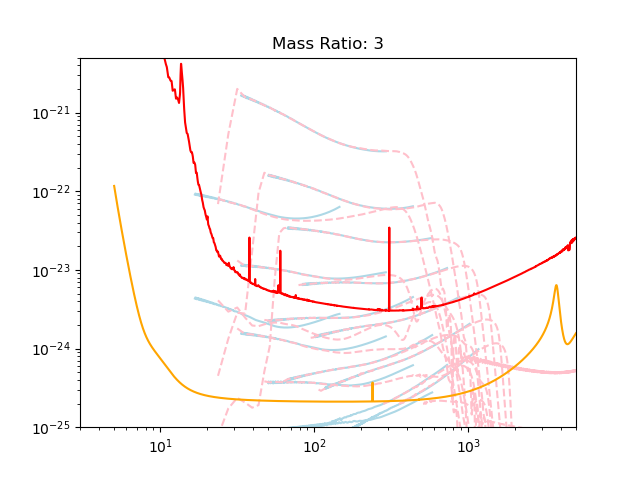

In [5]:
isxs.iplt_lm(h=h2139, t=t2139, ratio=3, f22=f22_2139, df22dt=df22dt_2139, dt=dt, i1=i1_2139, i2=i2_2139)
plt.loglog(ce_asd_amplitude, ce_asd_frequency, label="CE", color = "orange")
plt.loglog(ligo_o4_asd_amplitude, ligo_o4_asd_frequency, label="LIGO O4", color = "red")
plt.show()

Play around with the slider to change the mass and distances! The units for mass is in solar mass, and the units for distance is in mega parsecs (Mpc)

## Example 2: BBH1441 (Mass Ratio: 8)

In [6]:
metadata1441, h1441 = isxs.load_strain("1441")

Mass ratio: 7.999135513668829


In [7]:
h1441, t1441, f22_1441, df22dt_1441, dt, i1_1441, i2_1441 = isxs.initialize(h1441, G, c, M, r)

15450


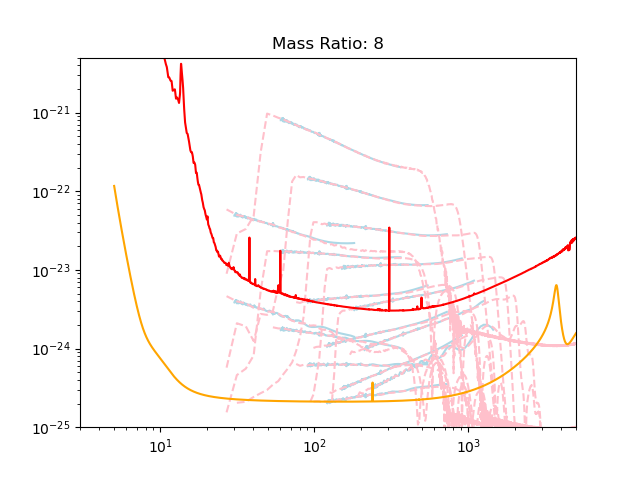

In [8]:
isxs.iplt_lm(h=h1441, t=t1441, ratio=8, f22=f22_1441, df22dt=df22dt_1441, dt=dt, i1=i1_1441, i2=i2_1441)
plt.loglog(ce_asd_amplitude, ce_asd_frequency, label="CE", color = "orange")
plt.loglog(ligo_o4_asd_amplitude, ligo_o4_asd_frequency, label="LIGO O4", color = "red")
plt.show()

## Example 3: BBH1107 (Mass Ratio:10)

In [9]:
metadata1107, h1107 = isxs.load_strain("1107")

Mass ratio: 9.999824397605714


In [10]:
metadata1107

Metadata([('simulation_name', 'BBH_CFMS_d13_q10_sA_0_0_0_sB_0_0_0/Lev4'),
          ('alternative_names', ['PRIVATE:BBH:0002', 'SXS:BBH:1107']),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 30.4451525855),
          ('reference_mass_ratio', 9.999824397605714),
          ('reference_chi_eff', 3.3290689603344968e-06),
          ('reference_chi1_perp', 1.4699966378912382e-07),
          ('reference_chi2_perp', 8.857058617582898e-08),
          ('reference_eccentricity', 0.0011603),
          ('reference_dimensionless_spin1',
           [-6.45030612062e-08, -1.32091856513e-07, 3.65619772075e-06]),
          ('reference_dimensionless_spin2',
           [5.03608125798e-09, 8.84272953694e-08, 5.78387980902e-08]),
          ('reference_orbital_frequency',
           [1.33558302435e-10, -1.1168397799e-10, 0.0194465075107]),
          ('reference_mass1', 0.909084681497),
          ('reference_mass2', 0.0909100645522),
          (

In [11]:
h1107, t1107, f22_1107, df22dt_1107, dt, i1_1107, i2_1107 = isxs.initialize(h1107, G, c, M, r)

15796


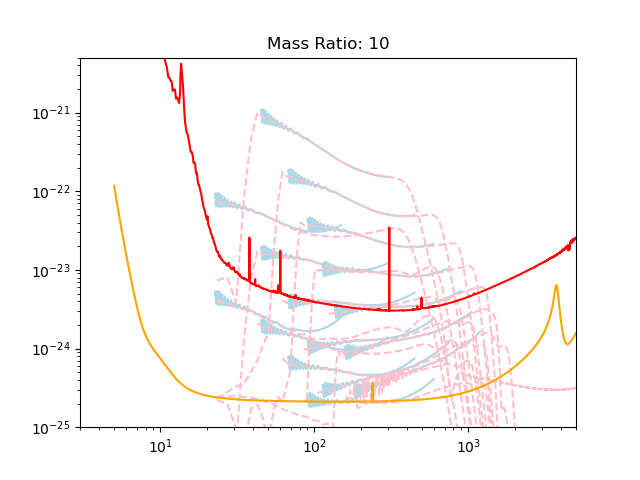

In [12]:
isxs.iplt_lm(h=h1107, t=t1107, ratio=10, f22=f22_1107, df22dt=df22dt_1107, dt=dt, i1=i1_1107, i2=i2_1107)
plt.loglog(ce_asd_amplitude, ce_asd_frequency, label="CE", color = "orange")
plt.loglog(ligo_o4_asd_amplitude, ligo_o4_asd_frequency, label="LIGO O4", color = "red")
plt.show()

## Example 4: BBH1154 (Mass Ratio: 1)

In [13]:
metadata1154, h1154 = isxs.load_strain("1154")

Mass ratio: 1.0000000045100514


In [14]:
h1154, t1154, f22_1154, df22dt_1154, dt, i1_1154, i2_1154 = isxs.initialize(h1154, G, c, M, r)

26998


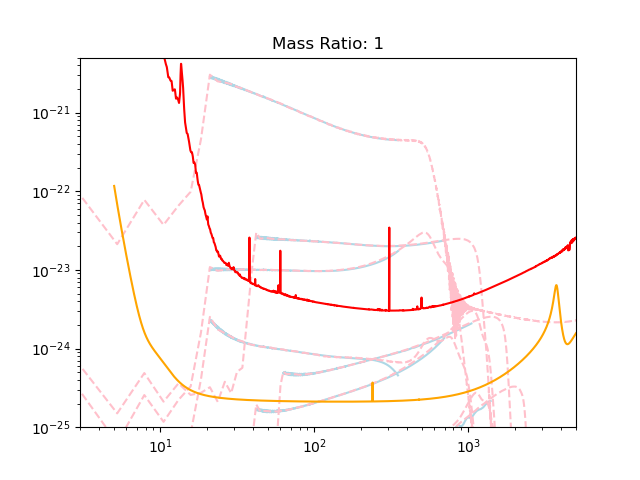

In [15]:
isxs.iplt_lm(h=h1154, t=t1154, ratio=1, f22=f22_1154, df22dt=df22dt_1154, dt=dt, i1=i1_1154, i2=i2_1154, cut=False)
plt.loglog(ce_asd_amplitude, ce_asd_frequency, label="CE", color = "orange")
plt.loglog(ligo_o4_asd_amplitude, ligo_o4_asd_frequency, label="LIGO O4", color = "red")
plt.show()